# Visualizing Forecasts using GridDS

- Following from the previous example [autoregression experiment](https://gridds.readthedocs.io/en/public_091422/autoregression.html) we now demonstrate how to use gridds visualization tools to inspect the results of forecasted data.
- Here we use synthetic data from [Smart-DS](https://www.nrel.gov/grid/smart-ds.html) and downloaded from [BetterGrids.org](https://db.bettergrids.org/bettergrids/handle/1001/94)


In [24]:
import sys
from gridds.experimenter import Experimenter
from gridds.data import SmartDS 
import gridds.viz.viz as viz_tools
import os
import matplotlib.pyplot as plt
from gridds.models import ARIMA, VRAE, LSTM, VanillaRNN
import gridds.tools.tasks as tasks
import shutil
import pandas as pd
import pickle

## Recap running a forecasting experiment
- Here is a brief recap on how to run the forecasting experiment with inline comments provided.

In [3]:
# run experiments from root dir ( one up)
os.chdir('../')

In [4]:

# instantiate smartDS dataset
dataset = SmartDS('univariate_nrel', sites=1, test_pct=.5, normalize=False, size=300)

# load customer data
reader_instructions = {
    'sources': ['P1U'],
    'modalities': ['load_data'],
    'target': '',  # NREL synthetic data doesn't have faults
    'replicates': ['customers']
}

# prepare x/y split of training data
dataset.prepare_data(reader_instructions)


# compile list of methods to use
methods = [ARIMA('ARIMA'),  VanillaRNN('RNN', train_iters=20, learning_rate=.001, batch_size=5, hidden_size=16), \
           VRAE('VRAE',train_iters=20, batch_size=5), \
           LSTM('LSTM', train_iters=20, batch_size=5, learning_rate=.003, layer_dim=1, hidden_size=32) ]


# run methods on task : "tasks.default_autoregression"
exp = Experimenter('autoregression_basic_tst', runs=1)
exp.run_experiment(dataset,methods,task=tasks.default_autoregression, clean=False)


univariate for now


/Users/ladd12/opt/anaconda3/envs/gmlc/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



3.1568607253332934 RNN Loss
2.013769963135322 RNN Loss
1.342854553212722 RNN Loss
1.0852512444059055 RNN Loss
1.0066352387269337 RNN Loss
0.9586644421021143 RNN Loss
0.904206208884716 RNN Loss
0.8503617445627848 RNN Loss
0.8014281404515108 RNN Loss
0.7548761752744516 RNN Loss
0.7136545218527317 RNN Loss
0.6804641311367353 RNN Loss
0.6533675293127695 RNN Loss
0.6290947298208872 RNN Loss
0.6069383881986141 RNN Loss
0.5868496696154276 RNN Loss
0.5684018799414238 RNN Loss
0.5513510747502247 RNN Loss
0.5355142702658972 RNN Loss
0.5207072465370098 RNN Loss
(0, 1)
SEQ LNE: 5
Epoch: 0


/Users/ladd12/opt/anaconda3/envs/gmlc/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning:

size_average and reduce args will be deprecated, please use reduction='sum' instead.



Average loss: 48.4186
Epoch: 1
Average loss: 20.5298
Epoch: 2
Average loss: 16.8933
Epoch: 3
Average loss: 13.6896
Epoch: 4
Average loss: 15.2054
Epoch: 5
Average loss: 11.5218
Epoch: 6
Average loss: 12.1956
Epoch: 7
Average loss: 13.2306
Epoch: 8
Average loss: 14.3331
Epoch: 9
Average loss: 15.0339
Epoch: 10
Average loss: 12.3878
Epoch: 11
Average loss: 10.1140
Epoch: 12
Average loss: 10.6057
Epoch: 13
Average loss: 9.6995
Epoch: 14
Average loss: 9.8572
Epoch: 15
Average loss: 8.9300
Epoch: 16
Average loss: 8.2770
Epoch: 17
Average loss: 7.7292
Epoch: 18
Average loss: 7.9161
Epoch: 19
Average loss: 8.2386
(0, 1)
4.251983463764191 LSTM Loss
3.207306995987892 LSTM Loss
2.4358395636081696 LSTM Loss
1.8750641246636708 LSTM Loss
1.4714738205075264 LSTM Loss
1.1891113420327504 LSTM Loss
1.0018086681763332 LSTM Loss
0.8825869287053744 LSTM Loss
0.8074937698741754 LSTM Loss
0.7595913509527842 LSTM Loss
0.732216523339351 LSTM Loss
0.7132632037003835 LSTM Loss
0.7000171542167664 LSTM Loss
0.692

## Recover Data and Visualize Result DataFrame
- `gridds` stores data from each run in an outputs directory titled by the run number and the experiment name.
- Here we recover the basic stats of the current run such as `MAE` and `RMSE`

In [14]:
# recover results for path run 0
base_path = os.path.join('outputs','autoregression_basic_tst', '0')
df_path = os.path.join(base_path,'results.csv')
exp_name = base_path.split('/')[-2]
df = pd.read_csv(df_path)
df

,method_name,mae,rmse
0,ARIMA,0.327589,0.297427
1,RNN,0.514133,0.660234
2,VRAE,0.629679,0.841270
3,LSTM,0.915000,1.356199


In [18]:
viz_tools.visualize_output(os.path.join('outputs', exp.name))

## Visualize Forecasts
- To save PDF/PNG versions of forecasts and other autoregression outputs one can just use the `viz_tools.visualize_output` functionality from the visualization library.
    - This will save outputs directly into `outputs/autoregression_tst` folder.
- Alternatively, this notebook will walkthrough this plotting procedure.
- Here we will plot each methods forecasts as a subplot.

Text(0.02, 0.5, 'kw')

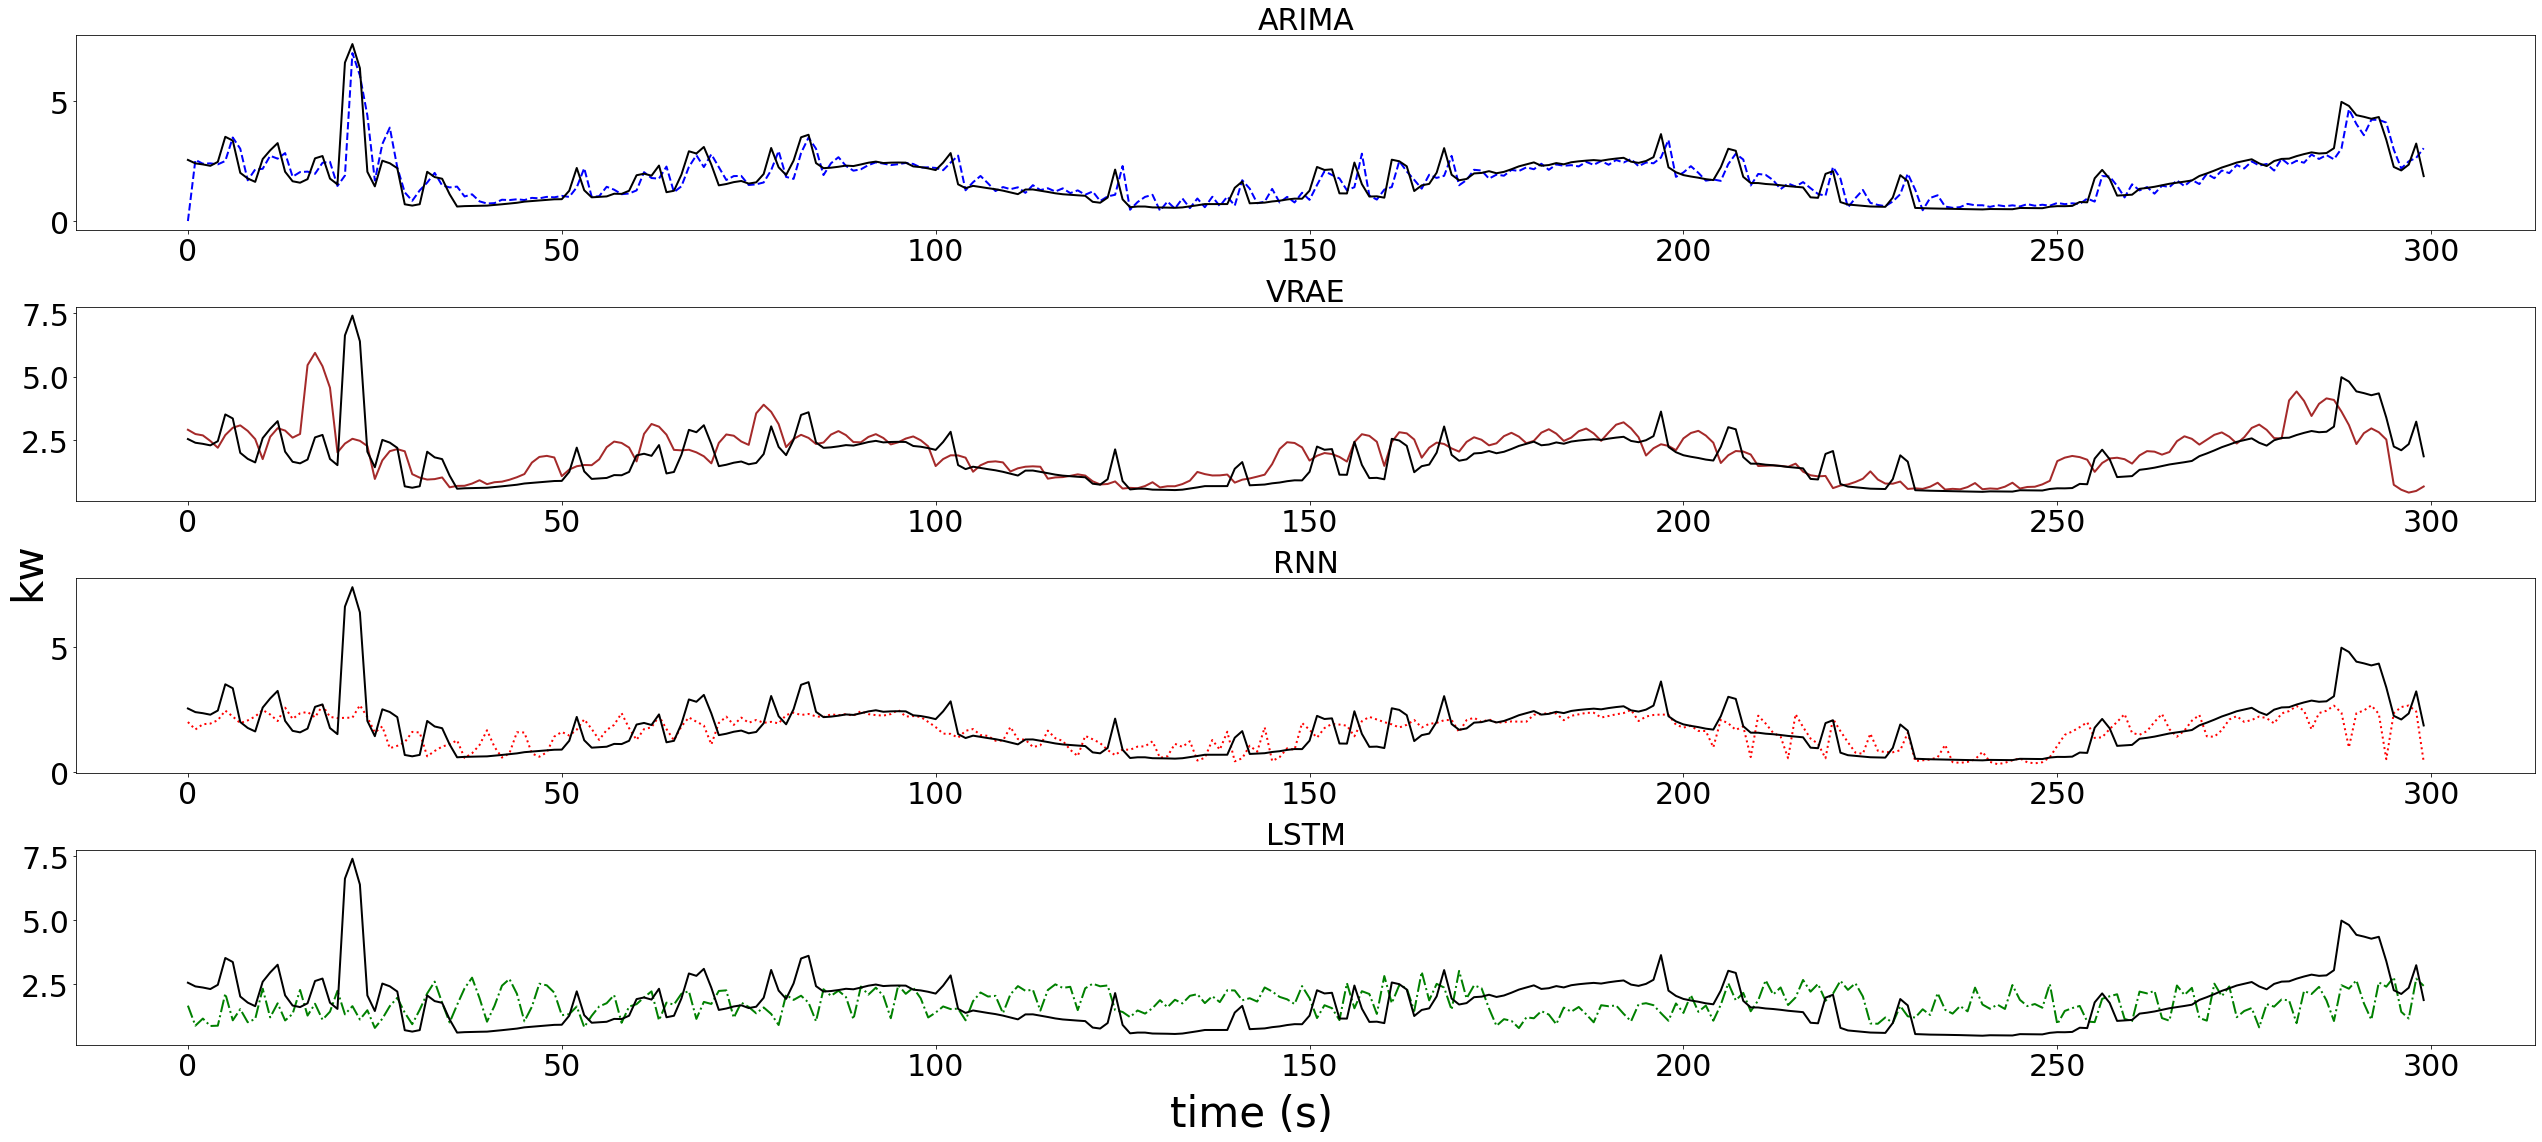

In [55]:
# set up figure to have the correct number of subplots for each method
num_methods = len([elem for elem in os.listdir(base_path) if os.path.isdir(os.path.join(base_path,elem))])
methods_fig, methods_axs = plt.subplots(nrows=num_methods, figsize=(9*num_methods,4*num_methods))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.8)

# set "run_num" = 0 since we did not do cross validation
run_num = 0
method_ix = 0

for method in os.listdir(base_path):
    curr_data = viz_tools.load_method(base_path, method, run_num)
    if not curr_data: continue
    methods_ax = methods_axs.flatten()[method_ix]
    viz_tools.methods_plot_result(methods_ax, curr_data)
    method_ix +=  1

# title axes
methods_fig.supxlabel('time (s)', fontsize=42)
methods_fig.supylabel('kw', fontsize=42)


## Visualize Loss
- During the experimenter run we also recorded the loss for each method.
- Some methods do not record loss (ARIMA).
- Here we plot the loss each on a specific subplot.
- When done through multiple runs, we can create confidence bounds on the loss but in this example we ran only once.

Text(0.5, 0.01, 'epoch')

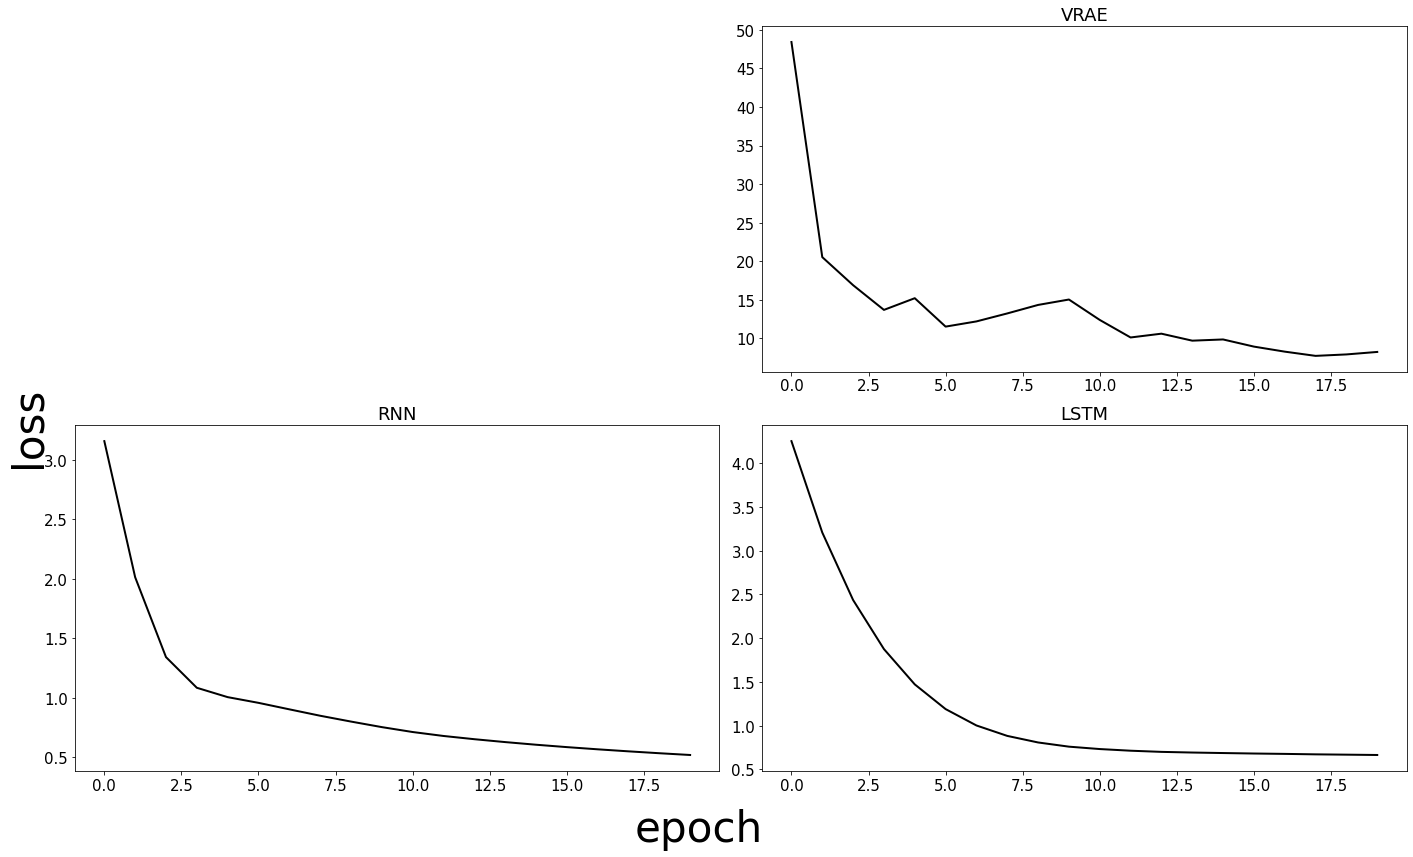

In [56]:
loss_fig, loss_axes = plt.subplots(ncols=num_methods//2, nrows=(num_methods//2)+num_methods%2 , figsize=(5*num_methods,3*num_methods))
method_ix = 0
for method in os.listdir(base_path):
    curr_data = viz_tools.load_method(base_path, method, run_num)
    if not curr_data: continue
    loss_ax = loss_axes.flatten()[method_ix]
    curr_loss = viz_tools.indv_loss_plot(loss_ax, curr_data)
    method_ix += 1
# title axes
loss_fig.supylabel('loss', fontsize=42)
loss_fig.supxlabel('epoch', fontsize=42)

